In [3]:
library(rjags)

### 1

#Binomial data with Beta prior

#  beta(p,q):  p=alpha, q= beta

bb.sum<-function(y,z,alfa,beta)
{
  # binomial - beta conjugate pairs
  #bb.sum(data, maximum value of the observation, prior parameter_a,prior parameter_b)
  #The function gives the parameters of the posterior distribution (Beta)  
  
  #bb.sum(data,havainnon maksimiarvo,priorialfa,prioribeta)
  #Funktio laskee posteriorijakauman parametrit (betajakauma)
  #sekä keskiarvon, varianssin ja moodin.
  #Binomiotos, priori betajakauma.
  n<-length(y)
  s<-sum(y)
  m<-n*z
  if(z>=max(y) & alfa>0 & beta>0 & min(y)>=0 & max(abs(y-round(y,digits=0)))==0
     & z-round(z,digits=0)==0)
  {
    alfa1<-alfa+s
    beta1<-beta+m-s
    ka<-alfa1/(alfa1+beta1)
    var<-alfa1*beta1/(alfa1+beta1)**2/(alfa1+beta1+1)
    mo<-min(1,max(0,(alfa1-1)/(alfa1+beta1-2)))
    list(alfa1=alfa1,beta1=beta1,Mean=ka,Var=var,Mode=mo)
  }
  else
    ("Datan arvojen pitää olla ei-negatiivisia kokonaislukuja ja pienempiä tai yhtä suuria kuin ")
  #maksimiarvo, alfan ja betan pitää olla positiivisia lukuja")
}


Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs



$alfa1
[1] 13

$beta1
[1] 9

$Mean
[1] 0.5909091

$Var
[1] 0.01051024

$Mode
[1] 0.6

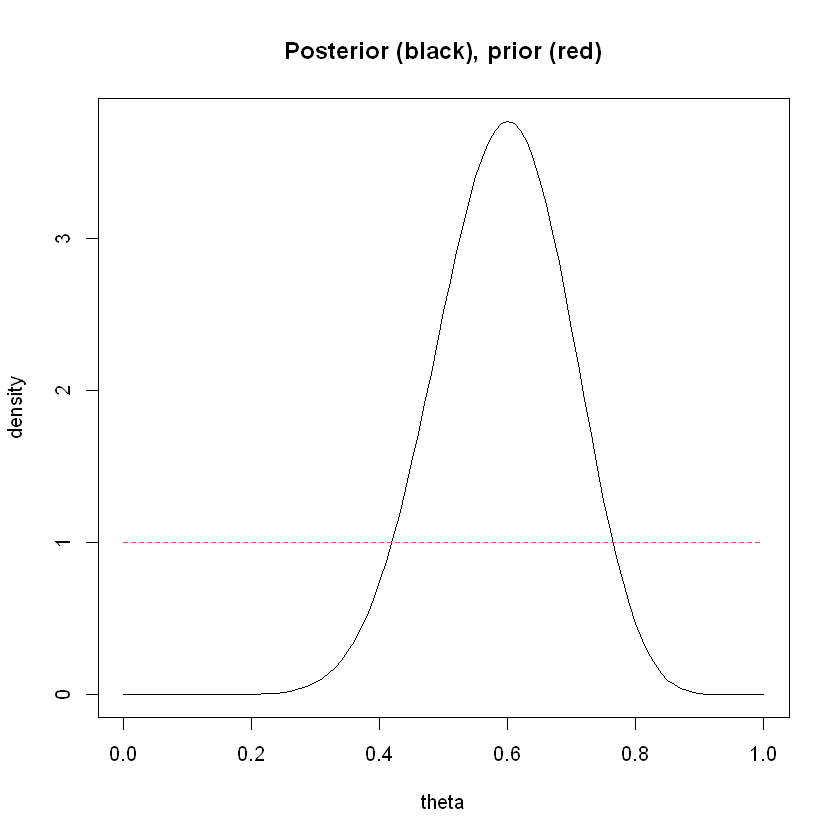

In [4]:
### a)

# x=12, n=20
grave.dat <- c(rep(1, 12), rep(0, 8))

# prior: Unif(0, 1)=Beta(1, 1)
bb.sum(grave.dat, 1, 1, 1)

# posterior inference for theta

# $alfa1
# [1] 13
# 
# $beta1
# [1] 9
# 
# $Mean
# [1] 0.5909091
# 
# $Var
# [1] 0.01051024
# 
# $Mode
# [1] 0.6

# posterior distribution is Beta(13, 9)

theta <- seq(0, 1, 0.01)
th.pr <- dbeta(theta, 1, 1) # prior density
th.ps <- dbeta(theta, 13, 9) # posterior density


# overlaid plots of prior and posterior distributions
plot(theta, th.ps, type = 'l', col='1', main="Posterior (black), prior (red)", ylab="density", xlab = "theta")
lines(theta, th.pr, lty=2, col='2')


$alfa1
[1] 22

$beta1
[1] 10

$Mean
[1] 0.6875

$Var
[1] 0.006510417

$Mode
[1] 0.7

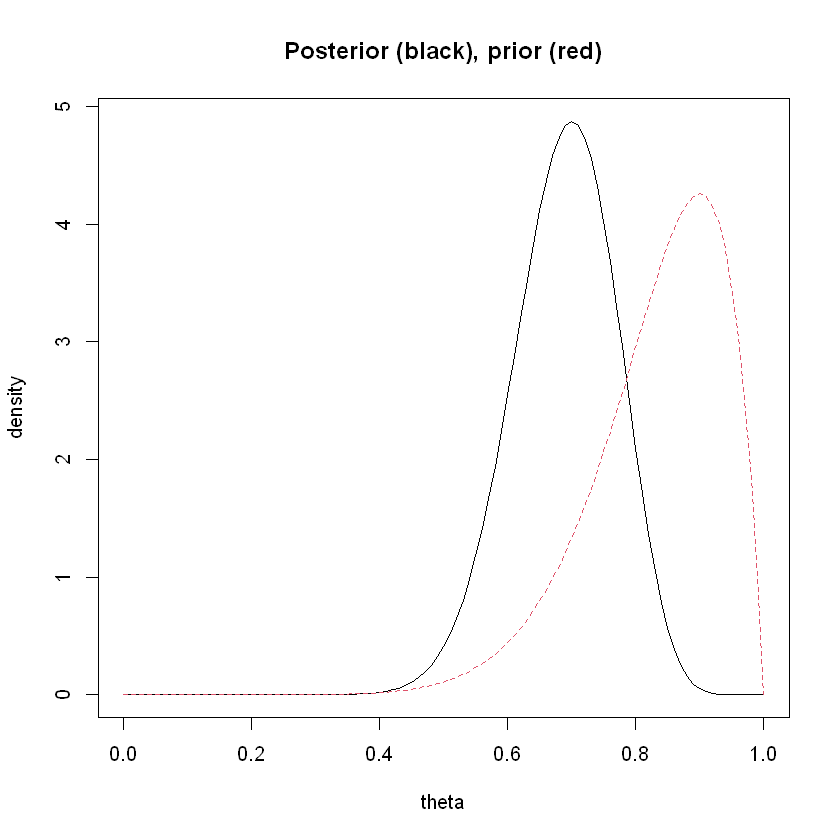

In [5]:
### b)

# prior: Beta(10, 2)
bb.sum(grave.dat, 1, 10, 2)

# posterior inference for theta

# $alfa1
# [1] 22
# 
# $beta1
# [1] 10
# 
# $Mean
# [1] 0.6875
# 
# $Var
# [1] 0.006510417
# 
# $Mode
# [1] 0.7

# posterior distribution is Beta(22, 10)

th.pr <- dbeta(theta, 10, 2) # prior density
th.ps <- dbeta(theta, 22, 10) # posterior density


# overlaid plots of prior and posterior distributions
plot(theta, th.ps, type = 'l', col='1', main="Posterior (black), prior (red)", ylab="density", xlab = "theta")
lines(theta, th.pr, lty=2, col='2')



In [6]:
### c)

# In a), a flat non-informative prior Unif(0, 1) is used with equal possibilities for all
# values of theta. 
# 
# In b) an informative prior Beta(10, 2) which reflects specific information about theta is used.

# The overlaid plots of the prior and posterior distributions in a) show that the
# non-informative prior has less influence on the resulting posterior which makes the 
# posterior density to look nothing like the prior density since very little specific information is
# known about theta. 

# The overlaid plots of the prior and posterior distributions in b) show that the 
# informative prior has more influence on the resulting posterior which makes the 
# posterior density to look like the prior density since the prior reflects specific 
# information about theta.

# The posterior inference for theta shows that the prior in a) resulted in a smaller posterior mean
# than that in b) but with bigger variability.

# From the results obtained above it clearly shows that a non-informative prior has less influence on the 
# posterior with a smaller posterior mean but bigger variability since only a little information is known
# about the unknown variable.

In [7]:
### 2)


cat("model{

 # likelihood
 
 for (i in 1:N){
 
  x[i] ~ dnorm(mu1, psi1)    # psi: precision not the variance
  y[i] ~ dnorm(mu2, psi2)
  
 }
 
 # prior
 
 
 psi1 ~ dgamma(0.35, 1.01)
 psi2 ~ dgamma(0.35, 1.01)
 
 mu1 ~ dnorm(0, 0.003*psi1)
 mu2 ~ dnorm(0, 0.003*psi2)

 tau1 <- 1/psi1
 tau2 <- 1/psi2
 delta <- mu1-mu2
 var.ratio <- tau1/tau2
 

}",
    
    file = "blood.jag"
)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 30
   Unobserved stochastic nodes: 4
   Total graph size: 46

Initializing model




Iterations = 10:10000
Thinning interval = 10 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

               Mean        SD  Naive SE Time-series SE
delta     1.925e+01 7.363e+00 2.329e-01      2.329e-01
mu1       1.771e+02 5.148e+00 1.628e-01      1.628e-01
mu2       1.578e+02 5.167e+00 1.634e-01      1.634e-01
psi1      2.572e-03 8.948e-04 2.830e-05      2.685e-05
psi2      2.759e-03 9.808e-04 3.102e-05      3.102e-05
tau1      4.423e+02 1.762e+02 5.572e+00      5.268e+00
tau2      4.156e+02 1.759e+02 5.562e+00      5.562e+00
var.ratio 1.211e+00 6.516e-01 2.061e-02      2.061e-02

2. Quantiles for each variable:

               2.5%       25%       50%       75%     97.5%
delta     4.998e+00 1.406e+01 1.946e+01 2.422e+01 3.290e+01
mu1       1.669e+02 1.739e+02 1.770e+02 1.804e+02 1.871e+02
mu2       1.478e+02 1.544e+02 1.578e+02 1.612e+02 1.679e+02
psi1      1.105e-03 1.923e-03 2.49

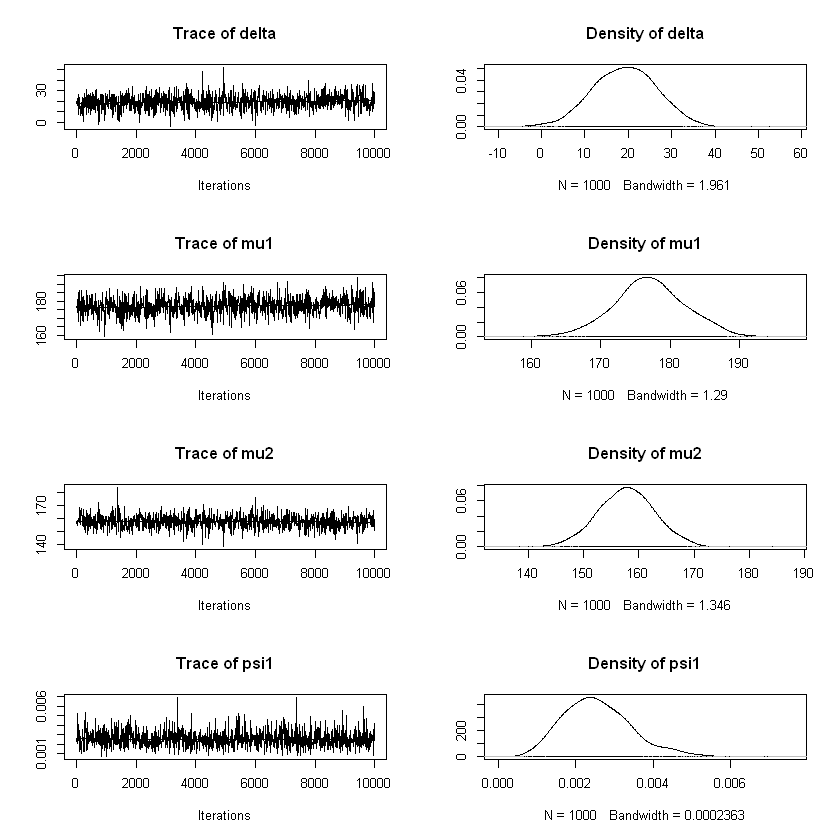

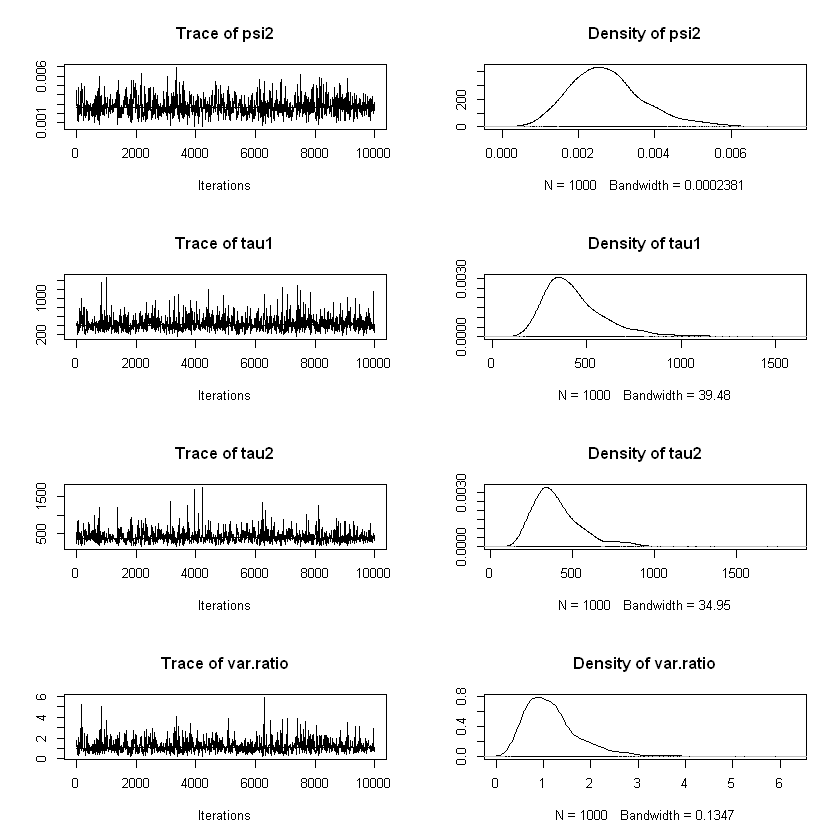

In [8]:
### a-b)

blood.inits = list(mu1=160.0, mu2=160.0, psi1=1, psi2=1)

blood.data = list(x=c(210, 169, 187, 160, 167, 176, 185, 206, 173, 146, 174, 201, 198, 148, 154),
                  y=c(201, 165, 166, 157, 147, 145, 168, 180, 147, 136, 151, 168, 179, 129, 131), N=15)

blood.pressure <- jags.model(file = 'blood.jag', data = blood.data, n.chains = 1, inits = blood.inits, n.adapt = 2000)

blood.par <- c("mu1", "mu2", "delta", "psi1", "psi2", "tau1", "tau2", "var.ratio")

blood.res <- coda.samples(blood.pressure, var=blood.par, n.iter = 10000, thin = 10)

summary(blood.res)

# 1. Empirical mean and standard deviation for each variable,
# plus standard error of the mean:
#   
#             Mean        SD  Naive SE Time-series SE
# delta     1.863e+01 7.548e+00 2.387e-01      2.552e-01
# mu1       1.765e+02 5.307e+00 1.678e-01      1.762e-01
# mu2       1.579e+02 5.291e+00 1.673e-01      1.673e-01
# psi1      2.642e-03 9.694e-04 3.065e-05      3.065e-05
# psi2      2.763e-03 9.940e-04 3.143e-05      3.143e-05
# tau1      4.396e+02 2.018e+02 6.383e+00      6.383e+00
# tau2      4.161e+02 1.750e+02 5.535e+00      5.535e+00
# var.ratio 1.223e+00 7.838e-01 2.478e-02      2.478e-02
# 
# 2. Quantiles for each variable:
#   
#               2.5%       25%       50%       75%     97.5%
# delta     3.657e+00 1.374e+01 1.873e+01 2.366e+01 3.347e+01
# mu1       1.666e+02 1.731e+02 1.766e+02 1.801e+02 1.869e+02
# mu2       1.471e+02 1.544e+02 1.579e+02 1.614e+02 1.686e+02
# psi1      1.099e-03 1.939e-03 2.530e-03 3.214e-03 4.851e-03
# psi2      1.187e-03 2.053e-03 2.647e-03 3.357e-03 4.896e-03
# tau1      2.062e+02 3.111e+02 3.952e+02 5.158e+02 9.102e+02
# tau2      2.042e+02 2.979e+02 3.778e+02 4.872e+02 8.425e+02
# var.ratio 3.793e-01 7.234e-01 1.043e+00 1.488e+00 3.072e+00

plot(blood.res)


In [9]:
### c)

# marginal posterior 95% hpd interval for mu

# (166.6, 186.9) for mu1
# (147.1, 168.6) for mu2


### d)

# Since the difference between mu1 and mu2 is 18.63, 
# we found evidence that mu2 is less than mu1. Therefore,
# we can conclude that the blood pressures after taking 
# the drug are less than the blood pressures before
# taking the drug, and so the drug is effective.

In [10]:
### 3)


cat("model{

 # likelihood
 for (i in 1:N){
  mpg[i] ~ dnorm(mu[i], psi)
  mu[i] <- beta0 + beta1*weight[i] + beta2*sixcyl[i] + beta3*eightcyl[i]
 
 }
 
  # priors
 beta0 ~ dnorm(0.0, 1.0E-04)
 beta1 ~ dnorm(0.0, 1.0E-04)
 beta2 ~ dnorm(0.0, 1.0E-04)
 beta3 ~ dnorm(0.0, 1.0E-04)
 psi ~ dgamma(0.01, 0.01)
 sigma2 <- 1.0/psi # variance
 
 # predictive
 mu.new <- beta0 + beta1 * weight.new + beta2 * sixcyl.new + beta3 * eightcyl.new
 mpg.new ~ dnorm(mu.new, psi)
 

}",
    
    file = "mpg.jag"
)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 32
   Unobserved stochastic nodes: 6
   Total graph size: 208

Initializing model




Iterations = 10:10000
Thinning interval = 10 
Number of chains = 3 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean      SD  Naive SE Time-series SE
beta0  33.8675 2.05621 0.0375410      0.0705334
beta1  -3.1702 0.77848 0.0142131      0.0295732
beta2  -4.2523 1.45807 0.0266206      0.0313000
beta3  -6.0902 1.66620 0.0304205      0.0487384
psi     0.1529 0.04191 0.0007652      0.0008081
sigma2  7.1238 2.87104 0.0524178      0.0550514

2. Quantiles for each variable:

           2.5%     25%     50%     75%   97.5%
beta0  30.00979 32.6984 33.9024 35.1442 37.6198
beta1  -4.66692 -3.6706 -3.1732 -2.6934 -1.6393
beta2  -7.04085 -5.2368 -4.2342 -3.2909 -1.5081
beta3  -9.36271 -7.1815 -6.0600 -5.0061 -2.8136
psi     0.08166  0.1233  0.1493  0.1786  0.2445
sigma2  4.09067  5.6000  6.6999  8.1128 12.2458


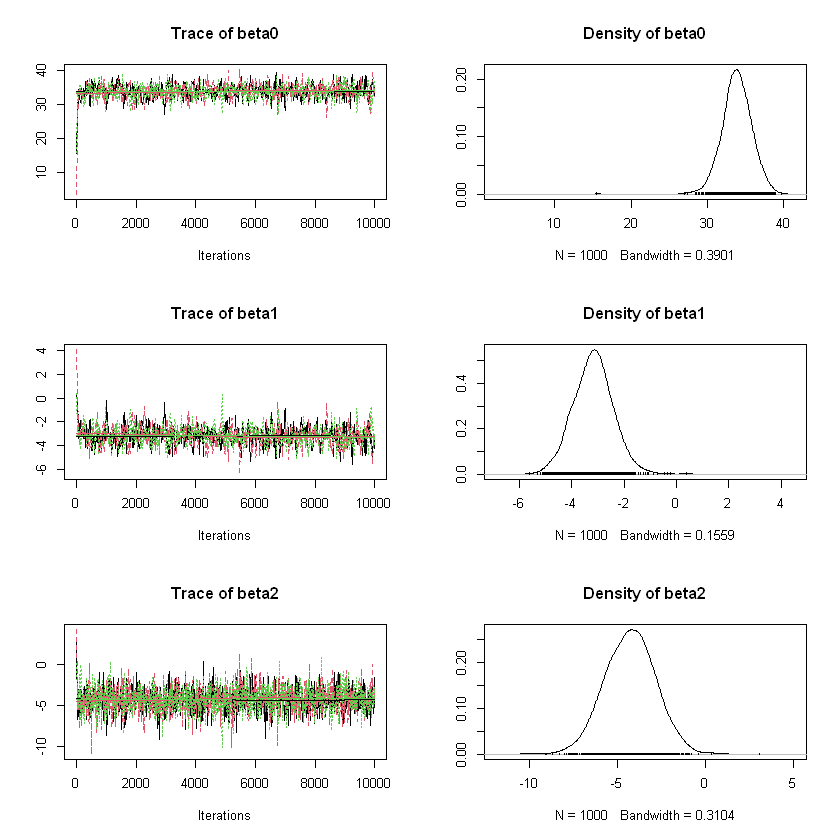

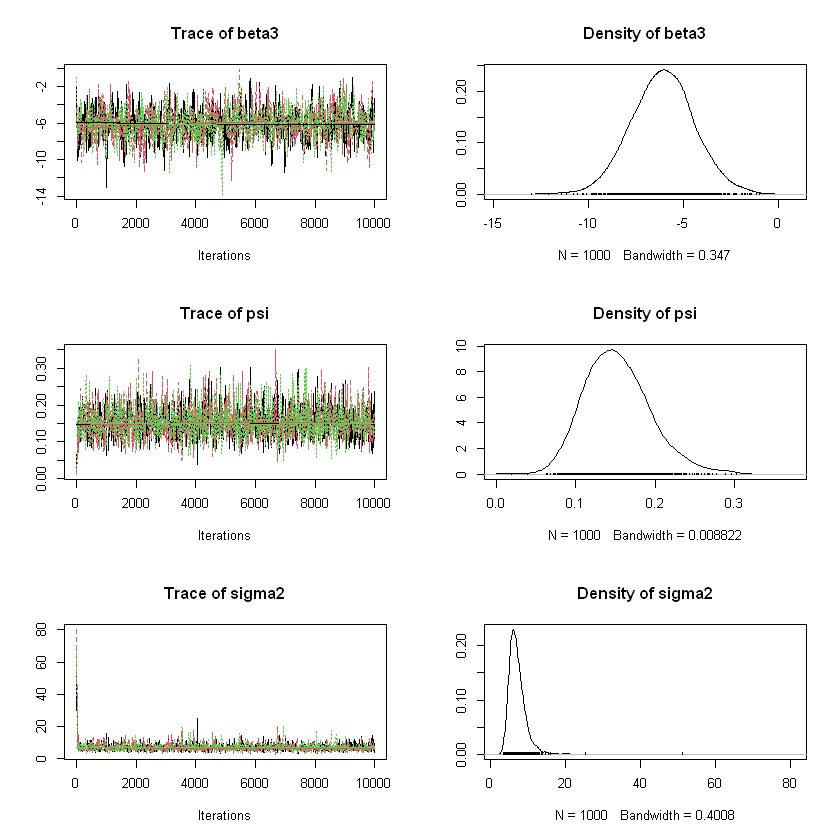

In [11]:
mpg.inits <- list(list(beta0=2, beta1=1, beta2=2, beta3=2, psi=1), list(beta0=2, beta1=5, beta2=2, beta3=1, psi=0.5), 
                  list(beta0=2, beta1=1, beta2=1, beta3=1, psi=0.05))

mpg.data = list(mpg=c( 21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7,
                       32.4, 30.4, 33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26.0, 30.4, 15.8, 19.7, 15.0, 21.4), 
                weight=c( 2.620, 2.875, 2.320,3.215, 3.440, 3.460, 3.570, 3.190, 3.150, 3.440, 3.440, 4.070, 3.730,
                          3.780, 5.250, 5.424, 5.345, 2.200, 1.615, 1.835, 2.465, 3.520, 3.435, 3.840, 3.845, 1.935, 2.140,
                          1.513, 3.170, 2.770, 3.570, 2.780), 
                sixcyl=c( 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0), 
                eightcyl=c(0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0), N=32, 
                weight.new = 3.5, sixcyl.new = 0, eightcyl.new = 0)

mpg.model <- jags.model(file = "mpg.jag", data = mpg.data, inits = mpg.inits, n.chains = 3, n.adapt = 2000)

mpg.par <- c("beta0", "beta1", "beta2", "beta3", "psi", "sigma2")

mpg.res <- coda.samples(model = mpg.model, variable.names = mpg.par, n.iter = 10000, thin = 10)

summary(mpg.res)

# 1. Empirical mean and standard deviation for each variable,
# plus standard error of the mean:
#   
#         Mean      SD  Naive SE Time-series SE
# beta0  33.9976 2.13389 0.0389593      0.0862392
# beta1  -3.2096 0.82422 0.0150481      0.0357609
# beta2  -4.2675 1.48671 0.0271435      0.0323638
# beta3  -6.0628 1.73952 0.0317592      0.0552862
# psi     0.1532 0.04095 0.0007477      0.0008118
# sigma2  7.0710 2.74553 0.0501263      0.0607342
# 
# 2. Quantiles for each variable:
#   
#           2.5%     25%     50%     75%   97.5%
# beta0  30.09684 32.7537 34.0498 35.3103 37.7739
# beta1  -4.78099 -3.7364 -3.2271 -2.6991 -1.6301
# beta2  -7.18468 -5.2255 -4.3027 -3.3119 -1.3492
# beta3  -9.33034 -7.1878 -6.0658 -4.9379 -2.6243
# psi     0.08551  0.1237  0.1503  0.1784  0.2415
# sigma2  4.14164  5.6050  6.6545  8.0816 11.6948

plot(mpg.res)


In [12]:
### b)

# i)

#  95% equal tail probability interval for beta0

# p(30.09684 < 33.9976(mean of beta0) < 37.7739) = 0.95

# (30.09684, 37.7739): the probability that this interval contains the true value of beta0 is 0.95

# ii)

#  95% equal tail probability interval for beta1

# p(-4.78099 < -3.2096 < -1.6301) = 0.95

# (-4.78099, -1.6301): the probability that this interval contains the true value of beta1 is 0.95


# iii)

#  95% equal tail probability interval for beta2

# p(-7.18468 < -4.2675 < -1.3492) = 0.95

# (-7.18468, -1.3492): the probability that this interval contains the true value of beta2 is 0.95


# iv)

#  95% equal tail probability interval for beta3

# p(-9.33034 < -6.0628 < -2.6243) = 0.95

# (-9.33034, -2.6243): the probability that this interval contains the true value of beta3 is 0.95


# v)

#  95% equal tail probability interval for psi

# p(0.08551 < 0.1532 < 0.2415) = 0.95

# (0.08551, 0.2415)


# vi)

#  95% equal tail probability interval for sigma2

# p(4.14164 < 7.0710 < 11.6948) = 0.95

# (4.14164, 11.6948)


In [13]:
### c)

# Looking at the regression coefficients beta2 and beta3 for
# sixcyl and eightcyl variables respectively, it clearly shows that moving
# from six cylinders (beta2 = -4.2675) to eight cylinders (beta3 = -6.0628)
# reduces the mpg by 1.7953. Therefore, we can say that the mpg of a car
# increases with decreasing number of cylinders.


Iterations = 10010:20000
Thinning interval = 10 
Number of chains = 3 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      22.75212        2.88016        0.05258        0.05530 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
17.24 20.82 22.76 24.62 28.44 


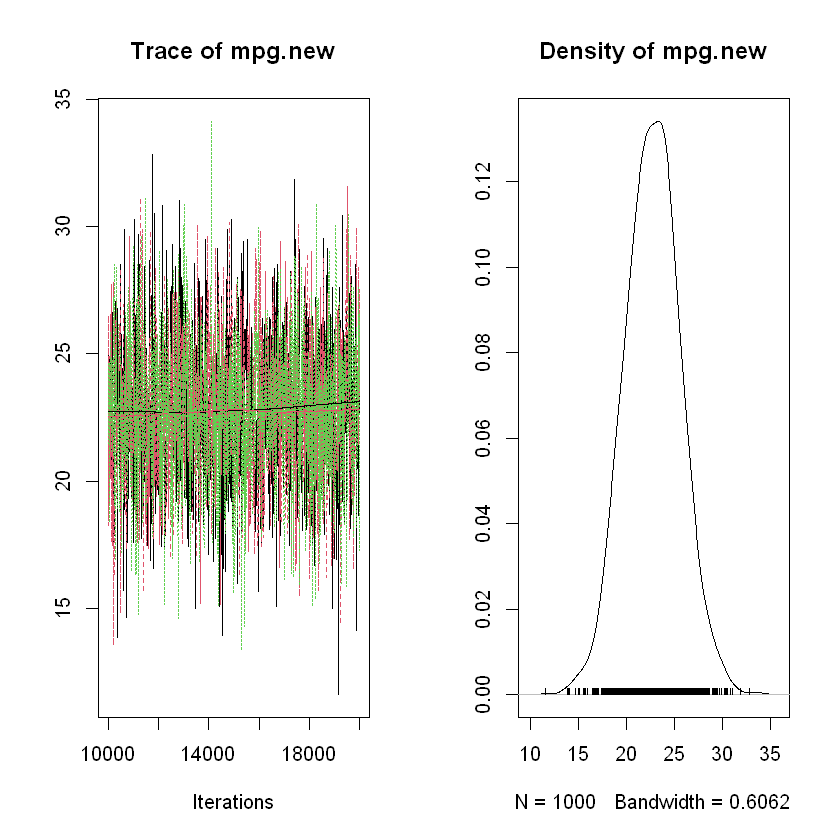

In [14]:
### d)


mpg.par <- c("mpg.new")

mpg.res <- coda.samples(model = mpg.model, variable.names = mpg.par, n.iter = 10000, thin = 10)

summary(mpg.res)

# 1. Empirical mean and standard deviation for each variable,
# plus standard error of the mean:
#   
#   Mean             SD       Naive SE Time-series SE 
# 22.8177         2.9794         0.0544         0.0544 
# 
# 2. Quantiles for each variable:
#   
#   2.5%   25%   50%   75% 97.5% 
# 16.68 20.85 22.85 24.78 28.61 

plot(mpg.res)
